In [58]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
# Filtering Data
df = pd.read_csv('aapl_2021_2023.csv')
df.columns = df.columns.str.strip() 
df.pop("C_DELTA")
df.pop("C_GAMMA")
df.pop("C_VEGA")
df.pop("C_THETA")
df.pop("C_RHO")
df.pop("C_VOLUME")
df70filter = df.STRIKE == 70.0 
df70 = df[df70filter]
df70filter = df70.EXPIRE_DATE.str.contains('^2023-07') # Change this filter to change the month
df70 = df70[df70filter]
df70.sort_values(by="DTE") 
df70.drop_duplicates(subset=[df70.columns[6]])
df70 = df70[df70 != " "].dropna(axis=0)
df70["C_BID"] = pd.to_numeric(df70["C_BID"])
df70["C_IV"] = pd.to_numeric(df70["C_IV"])
df70['QUOTE_DATE'] = pd.to_datetime(df70['QUOTE_DATE'], format = '%Y-%m-%d')
df70 = df70.sort_values(by = "QUOTE_DATE")
df70.index = range(len(df70))
df.head(50)

/var/folders/xz/p8m06xr55dv4n40tlgm3jl880000gn/T/ipykernel_58596/1269799058.py:2: DtypeWarning: Columns (14,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aapl_2021_2023.csv')


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_IV,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,0.000000,16 x 16,68.800000,68.950000,70.0,68.9,0.496
1,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,0.000000,1 x 1,63.750000,63.950000,75.0,63.9,0.460
2,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,0.000000,1 x 1,58.750000,58.950000,80.0,58.9,0.424
3,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,0.000010,53.160000,1 x 4,52.100000,55.700000,85.0,53.9,0.388
4,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,3.969420,47.300000,86 x 19,47.500000,50.400000,90.0,48.9,0.352
5,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,3.710680,38.740000,4 x 1,42.300000,45.650000,95.0,43.9,0.316
6,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,36.400000,15 x 10,37.100000,40.650000,100.0,38.9,0.280
7,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,3.363840,32.050000,1 x 1,32.600000,35.650000,105.0,33.9,0.244
8,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,30.670000,1 x 19,27.650000,29.550000,110.0,28.9,0.208
9,1656705600,2022-07-01 16:00,2022-07-01,138.9,2022-07-01,1656705600,0.0,,25.150000,19 x 125,26.900000,28.650000,111.0,27.9,0.201


# Structural breaks

Text(0.5, 0, 'Quote date')

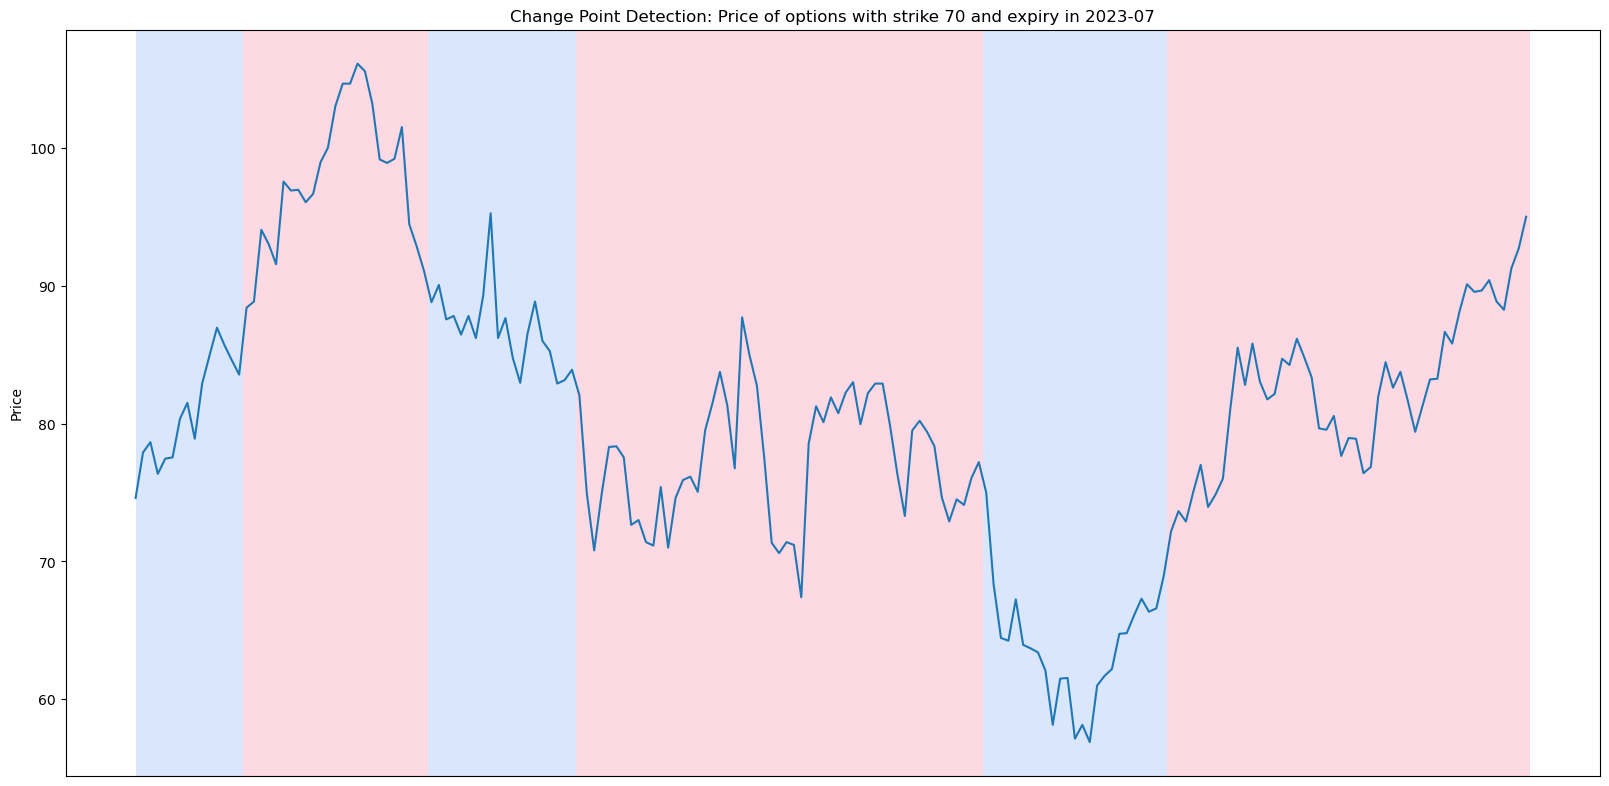

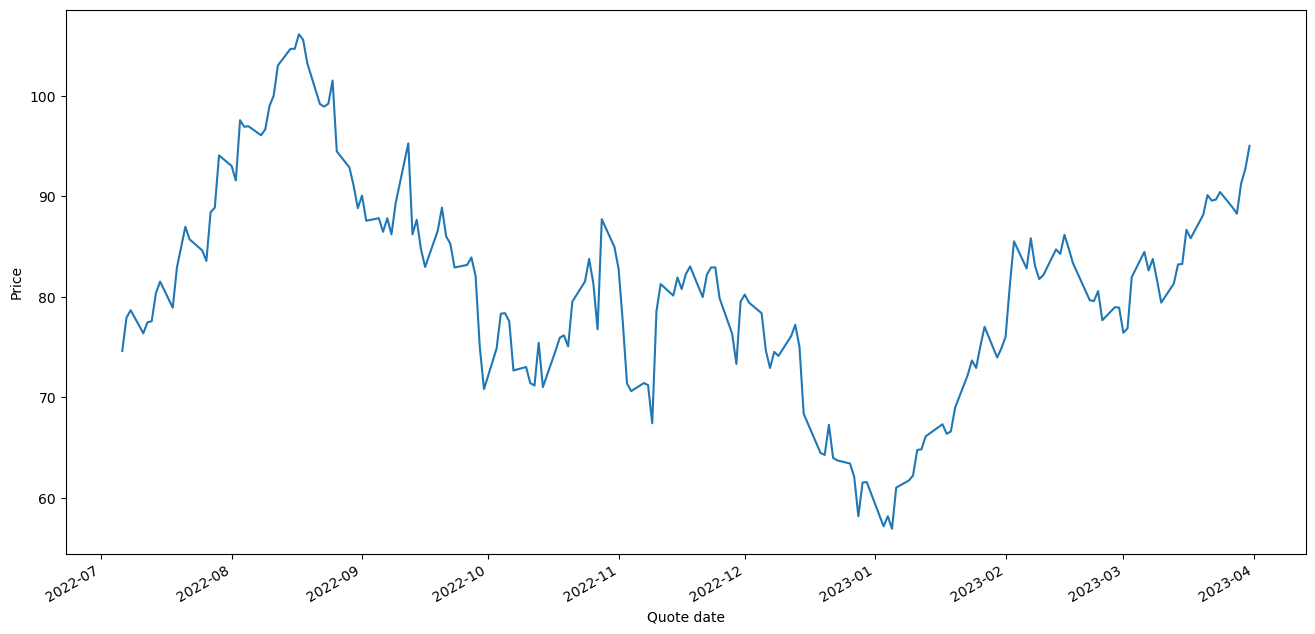

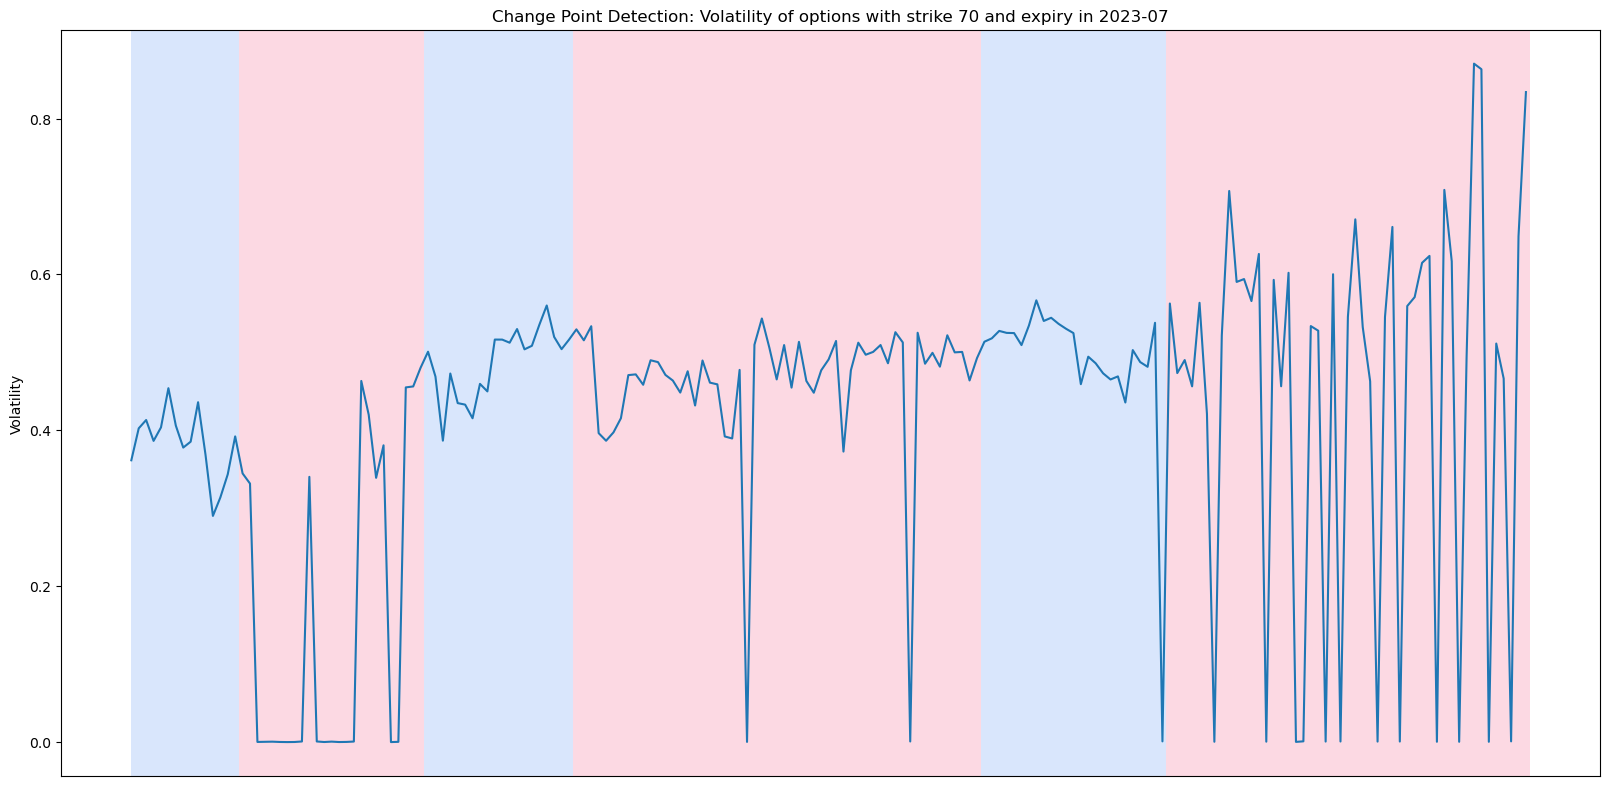

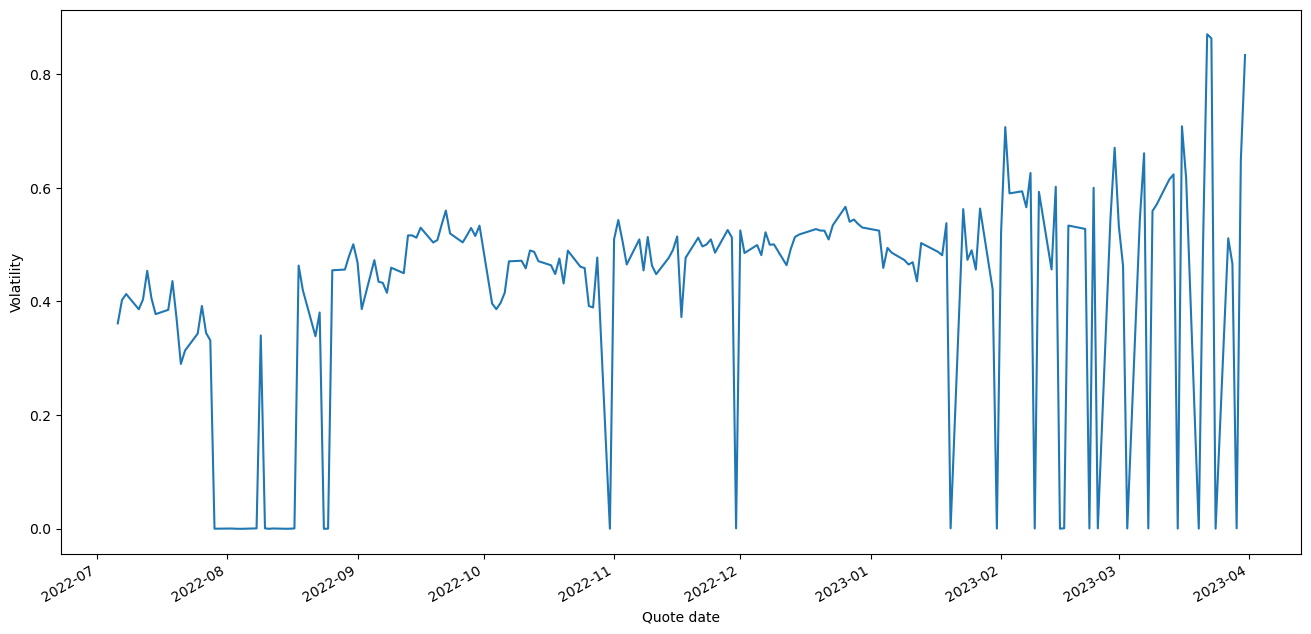

In [60]:
# Preprocessing
points=np.array(df70['C_BID'])
dates = np.array(df70['QUOTE_DATE'])


'''Other potential models for finding change points.'''
# model="rbf"
# algo = rpt.Pelt(model=model).fit(points)
# result = algo.predict(pen=10)
# rpt.display(points, result, figsize=(10, 6))
# plt.title('Change Point Detection: Pelt Search Method')
# plt.show()  
# print(result) 
# print(len(points))
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')

# model = "l2"  
# algo = rpt.Binseg(model=model).fit(points)
# my_bkps = algo.predict(n_bkps=10)
# # show results
# rpt.show.display(points, my_bkps, figsize=(10, 6))
# plt.title('Change Point Detection: Binary Segmentation Search Method')
# plt.show()
# print(my_bkps)
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')

# model = "l2"  
# algo = rpt.Window(width=40, model=model).fit(points)
# my_bkps = algo.predict(n_bkps=10)
# rpt.show.display(points, my_bkps, figsize=(10, 6))
# plt.title('Change Point Detection: Window-Based Search Method')
# print(my_bkps)
# df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(50, 20))	
# plt.title('Implied_Volatility Plot')





# Finding structural breaks
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=5)

# Plotting complementary curves
rpt.show.display(points, my_bkps, figsize=(16, 8))
plt.ylabel("Price")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.title('Change Point Detection: Price of options with strike 70 and expiry in 2023-07')
df70.plot(x=df70.columns[2], y=df70.columns[10], kind='line', figsize=(16, 8), legend=None)	
plt.ylabel("Price")
plt.xlabel("Quote date")

# Plotting complementary volatility curves
points = np.array(df70["C_IV"])
rpt.show.display(points, my_bkps, figsize=(16, 8))
plt.title('Change Point Detection: Volatility of options with strike 70 and expiry in 2023-07')
plt.ylabel("Volatility")
frame2 = plt.gca()
frame2.axes.get_xaxis().set_visible(False)
df70.plot(x=df70.columns[2], y=df70.columns[7], kind='line', figsize=(16, 8),legend=None)	
plt.ylabel("Volatility")
plt.xlabel("Quote date")
# plt.title('Bid Price over time of options with a strike of 70 and expiry in 2023-07')

[15, 40, 60, 115, 140, 189]
Structural Break on : 2022-07-26T00:00:00.000000000
Structural Break on : 2022-08-30T00:00:00.000000000
Structural Break on : 2022-09-27T00:00:00.000000000
Structural Break on : 2022-12-13T00:00:00.000000000
Structural Break on : 2023-01-20T00:00:00.000000000
Structural Break on : 2023-03-31T00:00:00.000000000


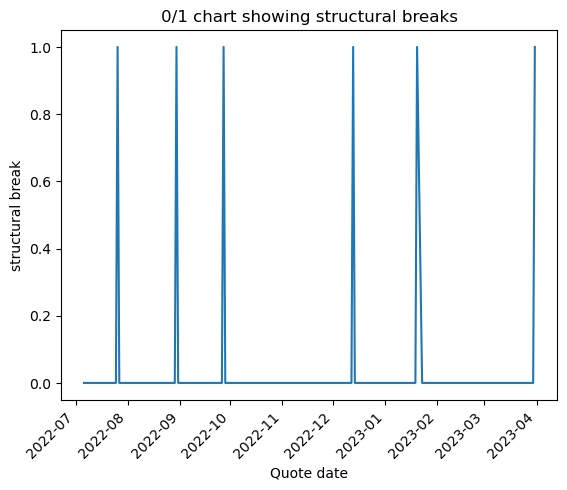

<Figure size 20000x12000 with 0 Axes>

In [61]:
# Identifying dates of structural breaks
zoArr = [0 for i in range(len(points))]
xArr = [i for i in range(len(points))]

result = my_bkps
arr = result
print(arr)
for i in arr:
    zoArr[i - 1] = 1
zoArr
plt.plot(dates,zoArr)
plt.xticks(rotation=45, ha='right')
plt.ylabel("structural break")
plt.xlabel("Quote date")
plt.title("0/1 chart showing structural breaks")
plt.figure(figsize=(200,120))





dates = np.array(df70['QUOTE_DATE'])
for i in arr:
    print("Structural Break on : {date}".format(date=dates[i - 1]))
difference_array = [0 for x in range(len(result) - 1)]
for i in range(0, len(result) - 1):
    difference_array[i] = result[i + 1] - result[i]
    

# LSTM

In [62]:
# Setting up the train data parameters
bid_prices = np.array(df70['C_BID'])
values = bid_prices
rnnN = min(difference_array)
training_data_len = math.ceil(len(values)* 0.8)
training_data_len = result[-2] - 15

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(rnnN, len(train_data)):
    x_train.append(train_data[i-rnnN:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-rnnN: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(rnnN, len(test_data)):
  x_test.append(test_data[i-rnnN:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [63]:
# Training the LSTM
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
105/105 [==============================] - 1s 4ms/step - loss: 0.0291
Epoch 2/3
105/105 [==============================] - 0s 4ms/step -

1.8886020541191102

/var/folders/xz/p8m06xr55dv4n40tlgm3jl880000gn/T/ipykernel_58596/3645645883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


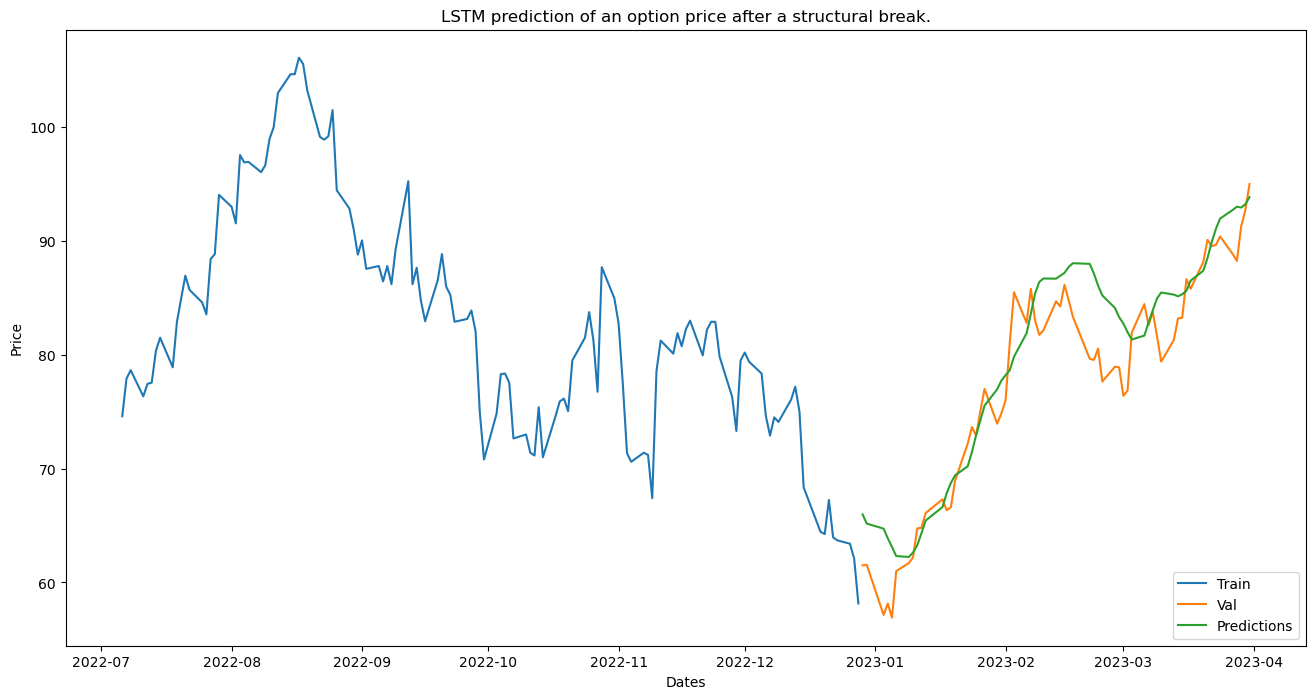

In [64]:
# Plotting the LSTM results
data = df70.filter(['C_BID'])
dates =  df70.filter(['QUOTE_DATE'])

train_dates = dates[:training_data_len]
train = data[:training_data_len]
validation = data[training_data_len:]
validation_dates = dates[training_data_len:]
validation['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('LSTM prediction of an option price after a structural break.')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(train_dates, train)
plt.plot(validation_dates, validation[['C_BID', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [65]:
# Testing the significance

validation['Difference'] = abs(validation['C_BID'] - validation['Predictions'])**2
dfBeforeSB = validation.iloc[:10]
print("sample mean squared difference before SB: {mu}\nsample std before SB: {sigma}".format(mu=dfBeforeSB.Difference.mean(), sigma=dfBeforeSB.Difference.std()))
dfAfterSB = validation.iloc[10:20]
print("sample mean squared difference after SB: {mu}\nsample std after SB {sigma}".format(mu=dfAfterSB.Difference.mean(), sigma=dfAfterSB.Difference.std()))
print(result[-2])
print(validation.head(30))

validation.Difference[:10]
from pingouin import ttest

ttest(dfBeforeSB.Difference, dfAfterSB.Difference, paired=True)

sample mean squared difference before SB: 16.65856234025275
sample std before SB: 20.184334339347956
sample mean squared difference after SB: 1.958537442084873
sample std after SB 1.9015614455066456
140
     C_BID  Predictions  Difference
125  61.50    65.980003   20.070430
126  61.55    65.167679   13.087600
127  57.15    64.726646   57.405571
128  58.15    63.876213   32.789516
129  56.90    63.111904   38.587753
130  61.00    62.318005    1.737136
131  61.70    62.237606    0.289020
132  62.20    62.624168    0.179919
133  64.75    63.263466    2.209784
134  64.80    64.321571    0.228894
135  66.10    65.438522    0.437553
136  67.30    66.619728    0.462770
137  66.35    67.841820    2.225526
138  66.60    68.751137    4.627389
139  68.95    69.408653    0.210363
140  72.20    70.206039    3.975879
141  73.65    71.455009    4.817983
142  72.90    72.956390    0.003180
143  75.05    74.226143    0.678741
144  77.00    75.535080    2.145991
145  73.95    76.968727    9.112713
146  

/var/folders/xz/p8m06xr55dv4n40tlgm3jl880000gn/T/ipykernel_58596/2880114113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Difference'] = abs(validation['C_BID'] - validation['Predictions'])**2
/Users/iskandersergazin/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/iskandersergazin/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.284558,9,two-sided,0.048202,"[0.14, 29.26]",1.025415,1.812,0.822088
